Hello, welcome to my Data Science Cookbook. This is a reflection of what I have learned from my Intro to Data Science class throughout the course of the fall semester

Name: Anthony Maniko
Title: Final Project

In [24]:
# Importing libraries - You can't run visualizations without importing the libraries 

import requests
import json
from bs4 import BeautifulSoup
from urllib.parse import unquote, quote
from datetime import datetime

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Pandas dataframe on the changes in the child mortality rate data imported from Our World In Data
#to create a dataframe you would need a csv file for it to read and construct a table representation of it.
#the syntax include: pd.read_csv('')

mortality_df= pd.read_csv("maternal-mortality ratio.csv").dropna() #dropna() drops all the Null values to avoid confusion and also clean data.
mortality_df

,Entity,Code,Year,Relative change in maternal mortality ratio since 1990,Continent
2,Afghanistan,AFG,2015,-70.447761,Asia
5,Albania,ALB,2015,-59.154930,Europe
7,Algeria,DZA,2015,-35.185185,Africa
11,Angola,AGO,2015,-58.879310,Africa
18,Argentina,ARG,2015,-27.777778,South America
...,...,...,...,...,...
541,Venezuela,VEN,2015,1.063830,South America
543,Vietnam,VNM,2015,-61.151079,Asia
551,Yemen,YEM,2015,-29.616088,Asia
556,Zambia,ZMB,2015,-61.178510,Africa


In [27]:
# The following are simple inbuilt functions to know more about your data
print(mortality_df.min())
print()
print(mortality_df.max())
print()
print(mortality_df.info())
print()
print(mortality_df.describe())
print()
print(mortality_df.value_counts())


Entity                                                    Afghanistan
Code                                                              AFG
Year                                                             2015
Relative change in maternal mortality ratio since 1990     -89.955687
Continent                                                      Africa
dtype: object

Entity                                                         Zimbabwe
Code                                                                ZWE
Year                                                               2015
Relative change in maternal mortality ratio since 1990        73.913043
Continent                                                 South America
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 2 to 559
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  ----------

In [28]:
print(mortality_df.columns)

Index(['Entity', 'Code', 'Year',
       'Relative change in maternal mortality ratio since 1990', 'Continent'],
      dtype='object')


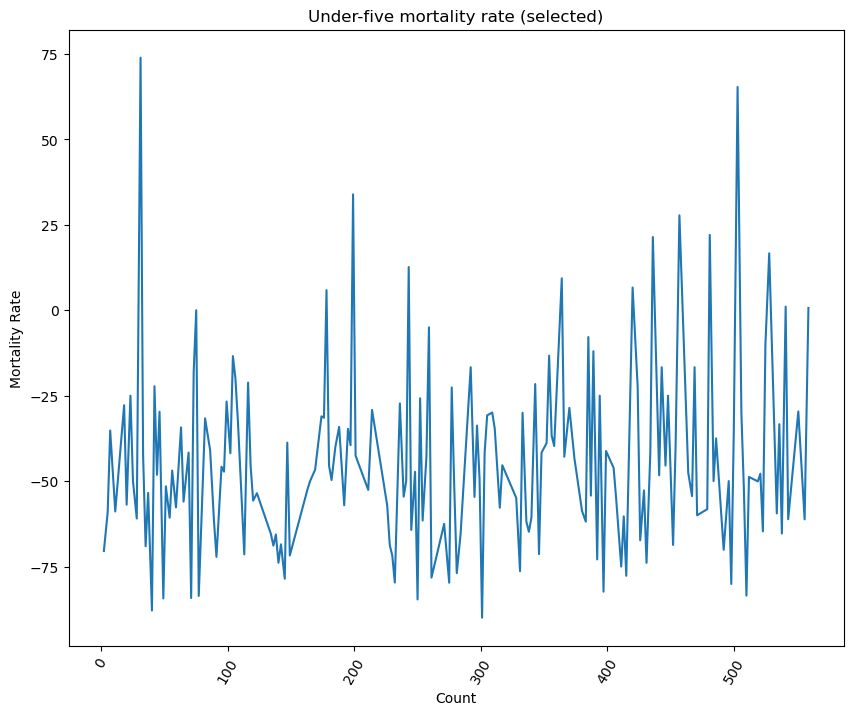

In [29]:
# Simple scatter plot

# First assignt he figure size and the axes point for the scatter plot
fig, axs = plt.subplots(figsize=(10, 8))
# Then get the column you would want to represnt mainly in your scatter plot
# After that get the kind of line you would want (i.e: line/dash...), and the rot if the angle of your tick lable. 
# ax is for the axes object on whihc your plot is created
mortality_df['Relative change in maternal mortality ratio since 1990'].plot(kind='line', rot=60, ax=axs)

# Declaring your lables and titles
plt.xlabel("Count")  # custom x label using Matplotlib

plt.ylabel("Mortality Rate")
plt.title('Under-five mortality rate (selected)')

# To print your graph
plt.show()

In [31]:
# Creating a pivot table for the mortality dataframe to anylyz and summarize the datasets

# Syntax: pd.pivot_table()

# Name of your dataframe
# The main value that you want to create the graph on 
# The index of the graoh in whihc you want the values to be dedicated to
# Column: to get the year column
mortality_pv= pd.pivot_table(mortality_df, values= 'Relative change in maternal mortality ratio since 1990', index='Entity',columns='Year')
mortality_pv.dropna()

Year,2015
Entity,
Afghanistan,-70.447761
Albania,-59.154930
Algeria,-35.185185
Angola,-58.879310
Argentina,-27.777778
...,...
Venezuela,1.063830
Vietnam,-61.151079
Yemen,-29.616088


In [34]:
# Focusing on Africa
df_Africa= mortality_df[mortality_df["Continent"]=="Africa"].dropna()
df_Africa

,Entity,Code,Year,Relative change in maternal mortality ratio since 1990,Continent
7,Algeria,DZA,2015,-35.185185,Africa
11,Angola,AGO,2015,-58.879310,Africa
46,Benin,BEN,2015,-29.687500,Africa
56,Botswana,BWA,2015,-46.913580,Africa
67,Burkina Faso,BFA,2015,-48.968363,Africa
69,Burundi,BDI,2015,-41.639344,Africa
73,Cameroon,CMR,2015,-18.131868,Africa
77,Cape Verde,CPV,2015,-83.593750,Africa
82,Central African Republic,CAF,2015,-31.627907,Africa
86,Chad,TCD,2015,-40.965517,Africa


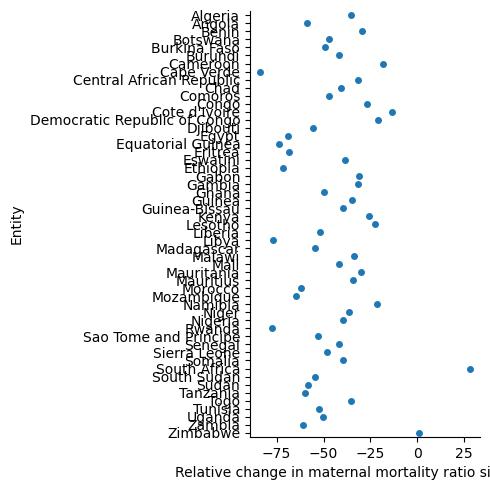

In [36]:
# Data visualization for the Asian overall Motality Change over the years using the seaborns catplot
sns.catplot(data=df_Africa, x="Relative change in maternal mortality ratio since 1990", y="Entity")

In [38]:
# Some simple inbuilt Functions to know more about your data
print(df_Africa.min())
print()
print(df_Africa.max())
print()
print(df_Africa.info())
print()
print(df_Africa.describe())
print()
print(df_Africa.value_counts())

Entity                                                     Algeria
Code                                                           AGO
Year                                                          2015
Relative change in maternal mortality ratio since 1990   -83.59375
Continent                                                   Africa
dtype: object

Entity                                                     Zimbabwe
Code                                                            ZWE
Year                                                           2015
Relative change in maternal mortality ratio since 1990    27.777778
Continent                                                    Africa
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 7 to 559
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Entity           

# Web Scrapping & API 

I love apple products and I'd love to work there so I wanted to scrape its website and mainly parse through the careers page

How To web scrape?

1. Get the url link
2. request to get information from the link
3. parse through the links content using html.parser from BeautifulSoup if its an html or Json if its in json format
4. print the soup

In [39]:
# Web scrapping and navigating websites 
#first get ther URL of the website you wanna scrape on
MS_url="https://www.apple.com/careers/us/work-at-apple.html"

# request to get the urls information
MS_resp= requests.get(MS_url)

#create a soup to parse on the whole websites content to later use ot to scrape
soup = BeautifulSoup(MS_resp.content, 'html.parser')
print(soup)


<!DOCTYPE html>

<!-- /* foundation (foundation.html) Start */ -->
<html lang="en-US">
<!-- /* componentpage (head.html) Start */ -->
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Work at Apple - Careers at Apple</title>
<meta content="telephone=no" name="format-detection"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="Apple Inc." name="Author"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://www.apple.com/careers/us/work-at-apple.html" rel="canonical"/>
<link href="https://www.apple.com/careers/us/work-at-apple.html" hreflang="en-us" rel="alternate"/>
<link href="https://www.apple.com/careers/ae/work-at-apple.html" hreflang="en-ae" rel="alternate"/>
<link href="https://www.apple.com/careers/at/work-at-apple.html" hreflang="de-at" rel="alternate"/>
<link href="https://www.apple.com/careers/th/work-at-apple.html" hreflang="th-th" rel="alternate"/>
<link href="https://www.ap

How to get all the links present in the website? 
This is how we generate links but some links dont work because they have different abbrievations from the ones that are originally directed for the links, so it is a flaw of this technique.

In [41]:
# Inspect from the website and get the link class for all the links present on the website
link_text=soup.find_all('a',{'class': "cmp-navigation__item-link" })

#create an iteration over all the links
for item in link_text:
    
    #
    name=item.text
    
    #syntax to lowercase it to allig with the link requirements
    lowercase=name.lower()
    
    #replace any whitespace with a - from the names of the links to connect it forthe link requirements
    link=lowercase.replace(' ','-')
    
    #get the newlink
    new_link= url+ link
    print(new_link)


In [44]:
# parsing through the diversity website
life_at_apple_url="https://www.apple.com/careers/us/life-at-apple.html" # using the "Life at Apple" link I generated in the previous code
life_at_apple_res=requests.get(life_at_apple_url)
soup=BeautifulSoup(life_at_apple_res.content, 'html.parser')
soup


<!DOCTYPE html>

<!-- /* foundation (foundation.html) Start */ -->
<html lang="en-US">
<!-- /* componentpage (head.html) Start */ -->
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Life at Apple - Careers at Apple</title>
<meta content="telephone=no" name="format-detection"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="Apple Inc." name="Author"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://www.apple.com/careers/us/life-at-apple.html" rel="canonical"/>
<link href="https://www.apple.com/careers/us/life-at-apple.html" hreflang="en-us" rel="alternate"/>
<link href="https://www.apple.com/careers/ae/life-at-apple.html" hreflang="en-ae" rel="alternate"/>
<link href="https://www.apple.com/careers/at/life-at-apple.html" hreflang="de-at" rel="alternate"/>
<link href="https://www.apple.com/careers/th/life-at-apple.html" hreflang="th-th" rel="alternate"/>
<link href="https://www.ap

For the following, I carry out a simple web scrapping for my application profile I need to sue when applying for a job at apple.

Parse and inspect the website to get all the information notted in the website using the syntax below
since the I inspected the content of the Careers' page, I inspected it and it was its own grouped element (div)

In [52]:
profile=soup.find_all('div',{"class":"content-wrapper -l"})
for item in profile:
    print(item.text)

# APIs

How do I work with APIs?

1.Get your API url
2.Requests to get the Sports URL 
3.Get the Json format to create a summarized version of your dataset
4.Print


In [47]:
# From my project 6 for CS Data Science Class
#Task 1: Make at least three API requests total.
sports_url= 'https://api.the-odds-api.com/v4/sports?apiKey=1915ed783eace238eb39b0e4fa150578'
sports_response= requests.get(sports_url)
sports=sports_response.json()
sports

[{'key': 'americanfootball_ncaaf',
  'group': 'American Football',
  'title': 'NCAAF',
  'description': 'US College Football',
  'active': True,
  'has_outrights': False},
 {'key': 'americanfootball_ncaaf_championship_winner',
  'group': 'American Football',
  'title': 'NCAAF Championship Winner',
  'description': 'US College Football Championship Winner',
  'active': True,
  'has_outrights': True},
 {'key': 'americanfootball_nfl',
  'group': 'American Football',
  'title': 'NFL',
  'description': 'US Football',
  'active': True,
  'has_outrights': False},
 {'key': 'americanfootball_nfl_super_bowl_winner',
  'group': 'American Football',
  'title': 'NFL Super Bowl Winner',
  'description': 'Super Bowl Winner 2023/2024',
  'active': True,
  'has_outrights': True},
 {'key': 'aussierules_afl',
  'group': 'Aussie Rules',
  'title': 'AFL',
  'description': 'Aussie Football',
  'active': True,
  'has_outrights': False},
 {'key': 'basketball_nba',
  'group': 'Basketball',
  'title': 'NBA',
  

Create a function to get the sport name from the Json we created before to create a link for easy access to different websites.

1.Define function


2.Create a list to store the main requorement for the link that is the name of the league to be attached with the url link.


3.Create iteration and conditionals according to get the link

In [48]:
def sport(sport_name):
    result=[]
    for item in sports:
        key=item['key']
        if sport_name in key:
            result.append(key)
    return result

In [49]:
#Soccer name generation example for General URL processing 

sport('soccer')

['soccer_australia_aleague',
 'soccer_austria_bundesliga',
 'soccer_belgium_first_div',
 'soccer_efl_champ',
 'soccer_england_league1',
 'soccer_england_league2',
 'soccer_epl',
 'soccer_fa_cup',
 'soccer_fifa_world_cup_winner',
 'soccer_france_ligue_one',
 'soccer_france_ligue_two',
 'soccer_germany_bundesliga',
 'soccer_germany_bundesliga2',
 'soccer_germany_liga3',
 'soccer_greece_super_league',
 'soccer_italy_serie_a',
 'soccer_italy_serie_b',
 'soccer_mexico_ligamx',
 'soccer_netherlands_eredivisie',
 'soccer_poland_ekstraklasa',
 'soccer_portugal_primeira_liga',
 'soccer_spain_la_liga',
 'soccer_spain_segunda_division',
 'soccer_spl',
 'soccer_switzerland_superleague',
 'soccer_turkey_super_league',
 'soccer_uefa_champs_league',
 'soccer_uefa_euro_qualification',
 'soccer_uefa_europa_conference_league',
 'soccer_uefa_europa_league']

Other way to get URL.

1. Get the url
2. Combine the url with the sport name and then return it

In [50]:
def get_url(sport):
    baseurl='https://api.the-odds-api.com/v4/sports/'
    odds='/odds/?apiKey=1915ed783eace238eb39b0e4fa150578&regions=us&markets=h2h,spreads&oddsFormat=american'
    url=baseurl + sport +odds
    return url

In [51]:
get_url('soccer_epl')

'https://api.the-odds-api.com/v4/sports/soccer_epl/odds/?apiKey=1915ed783eace238eb39b0e4fa150578&regions=us&markets=h2h,spreads&oddsFormat=american'